In [4]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import cv2
from matplotlib.colors import hsv_to_rgb
from skimage.io import imread, imshow
from skimage.color import rgb2hsv

# PRIMER MÉTODO

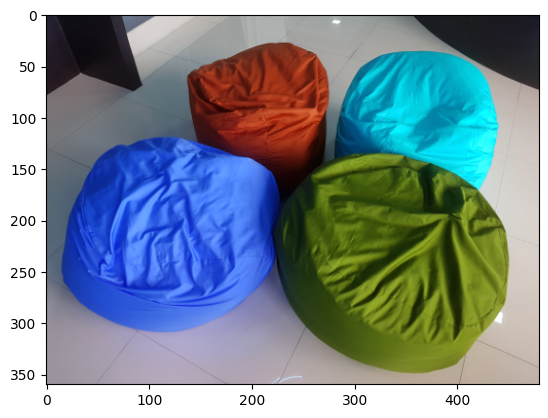

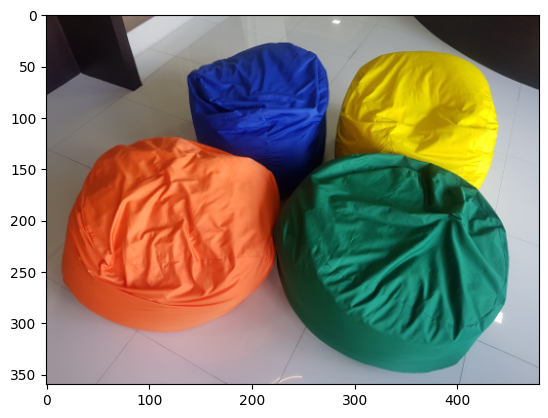

In [5]:

img = cv2.imread('C:/Users/jmanc/Downloads/bags.png')
plt.imshow(img)
plt.show()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

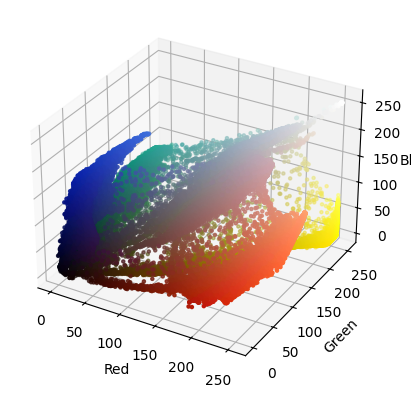

In [8]:
r, g, b = cv2.split(img)
fig = plt.figure()
axis = fig.add_subplot(1,1,1,projection = "3d")
pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1],3))
norm = colors.Normalize(vmin =-1., vmax = 1. )
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors = pixel_colors, marker = ".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

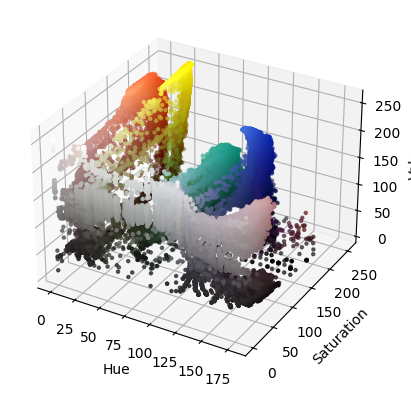

In [9]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv_img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection = "3d")
axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors = pixel_colors, marker = ".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [64]:
# Para bolsa amarilla
light_yellow = (40,255, 255)
dark_yellow = (20, 150, 150)

# Para bolsa azul
light_blue = (140, 255, 255)
dark_blue = (100, 150, 20)

# Para bolsa naranja
light_orange = (15,255, 255)
dark_orange = (5, 100, 50)

# Para bolsa verde
light_green = (110, 255, 255)
dark_green = (54, 101, 50)

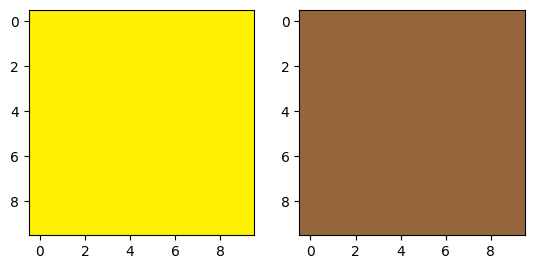

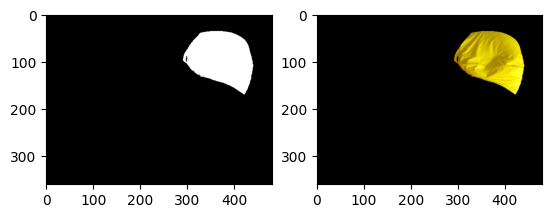

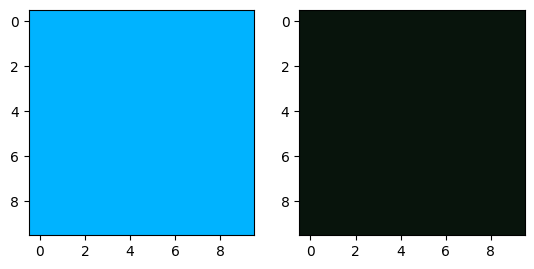

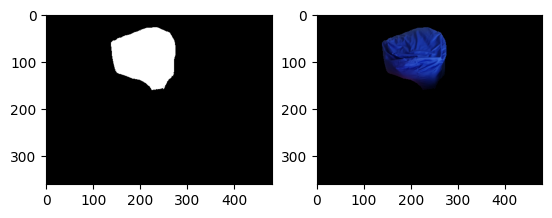

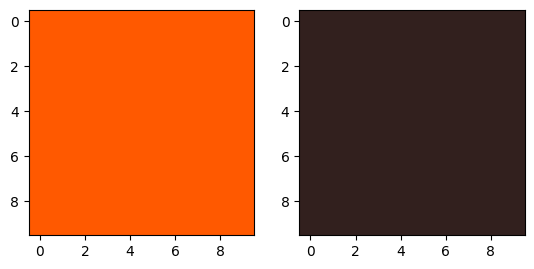

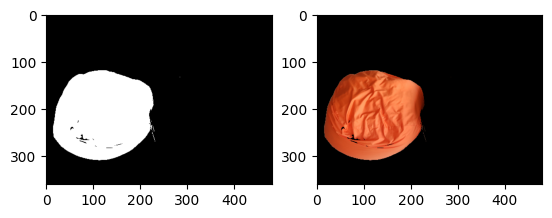

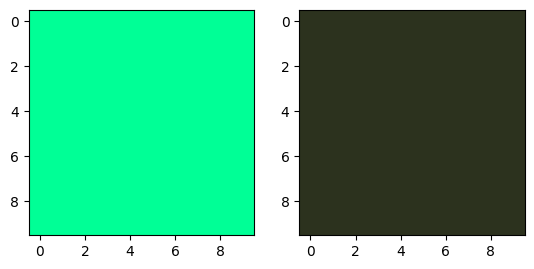

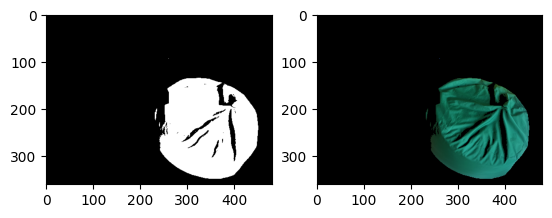

In [69]:
###################################################         AMARILLO           ################################################################
lo_square = np.full((10,10,3), light_yellow, dtype = np.uint8) / 255.0
do_square = np.full((10,10,3), dark_yellow, dtype = np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lo_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(do_square))
plt.show()

mask_y = cv2.inRange(hsv_img, dark_yellow, light_yellow)
result = cv2.bitwise_and(img, img, mask = mask_y)
plt.subplot(1, 2, 1)
plt.imshow(mask_y, cmap = "gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()
###################################################           AZUL           ################################################################
lo_square = np.full((10,10,3), light_blue, dtype = np.uint8) / 255.0
do_square = np.full((10,10,3), dark_blue, dtype = np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lo_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(do_square))
plt.show()

mask_b = cv2.inRange(hsv_img, dark_blue, light_blue)
result = cv2.bitwise_and(img, img, mask = mask_b)
plt.subplot(1, 2, 1)
plt.imshow(mask_b, cmap = "gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()
###################################################           NARANJA             ################################################################
lo_square = np.full((10,10,3), light_orange, dtype = np.uint8) / 255.0
do_square = np.full((10,10,3), dark_orange, dtype = np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lo_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(do_square))
plt.show()

mask_o = cv2.inRange(hsv_img, dark_orange, light_orange)
result = cv2.bitwise_and(img, img, mask = mask_o)
plt.subplot(1, 2, 1)
plt.imshow(mask_o, cmap = "gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

###################################################            VERDE             ################################################################
lo_square = np.full((10,10,3), light_green, dtype = np.uint8) / 255.0
do_square = np.full((10,10,3), dark_green, dtype = np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lo_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(do_square))
plt.show()

mask_g = cv2.inRange(hsv_img, dark_green, light_green)
result = cv2.bitwise_and(img, img, mask = mask_g)
plt.subplot(1, 2, 1)
plt.imshow(mask_g, cmap = "gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

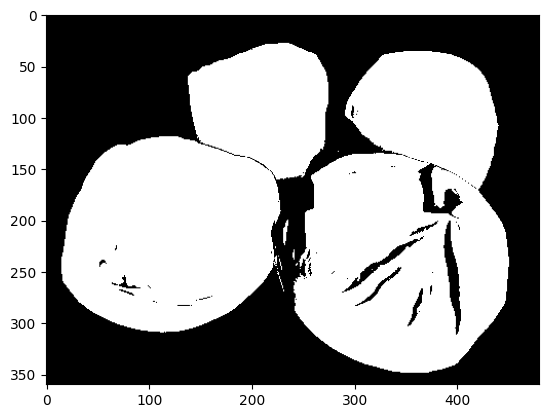

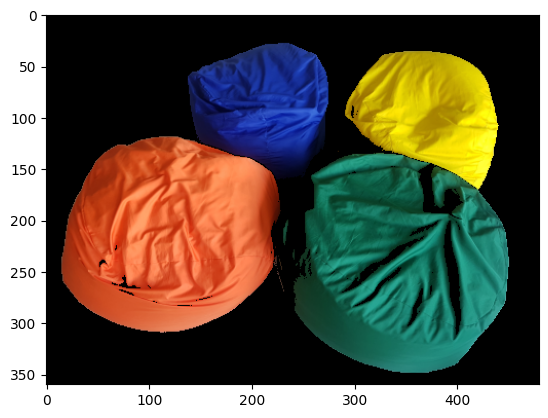

In [71]:
all_masks = cv2.add(mask_y, mask_b)
all_masks = cv2.add(all_masks, mask_g)
all_masks = cv2.add(all_masks, mask_o)

all = cv2.bitwise_and(img, img, mask = all_masks)

plt.imshow(all_masks, cmap = "gray")
plt.show()
plt.imshow(all)
plt.show()

# SEGUNDO MÉTODO

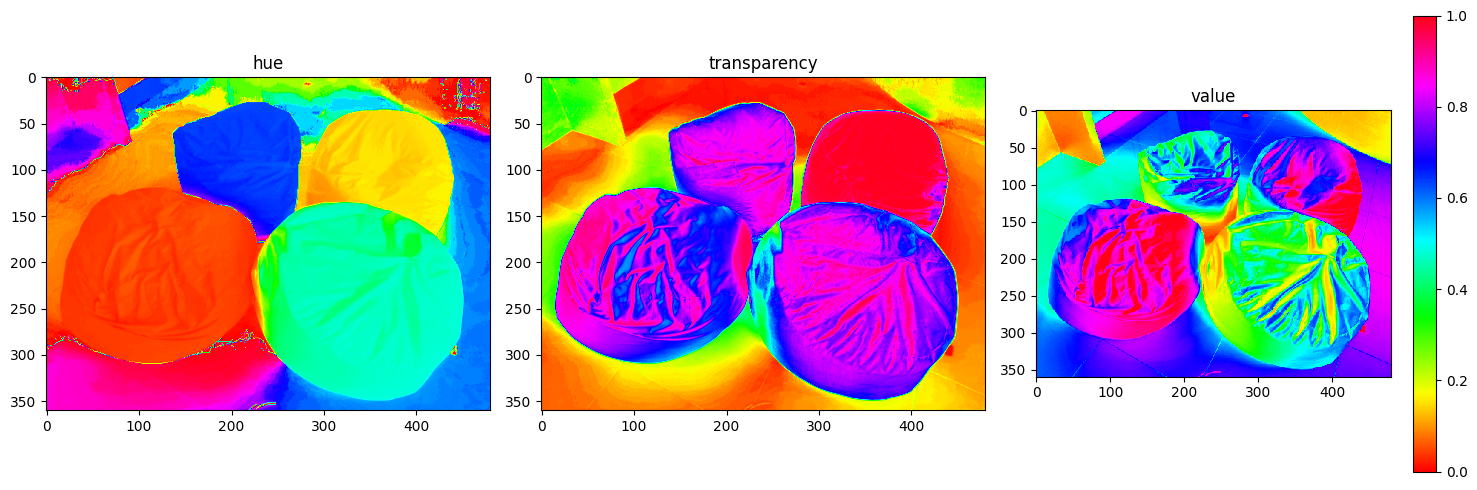

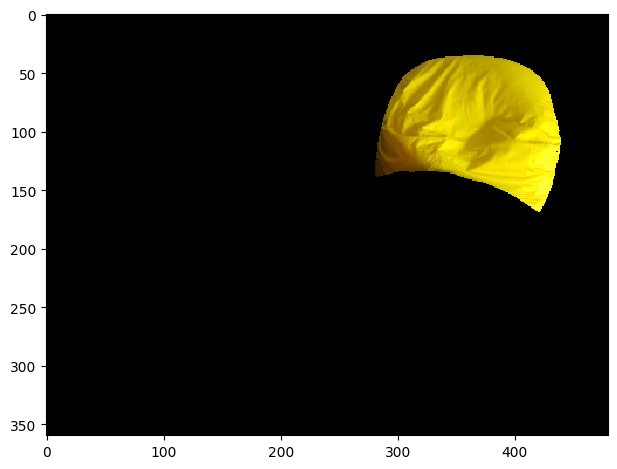

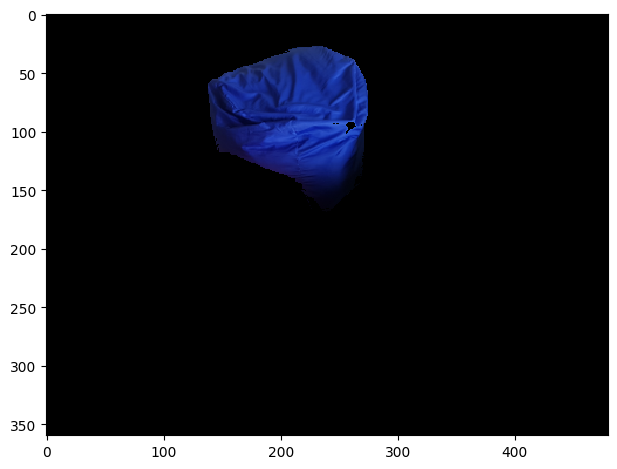

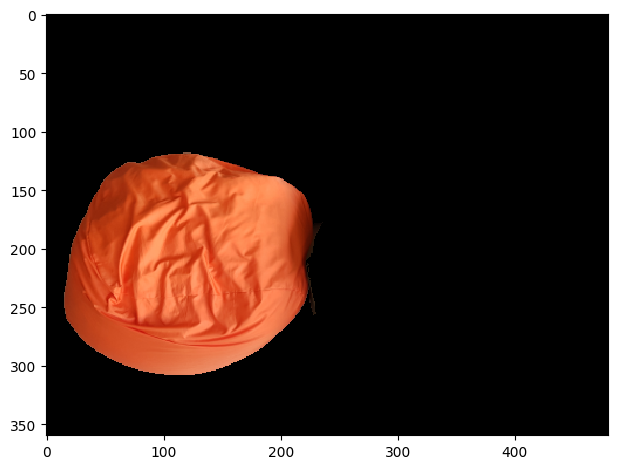

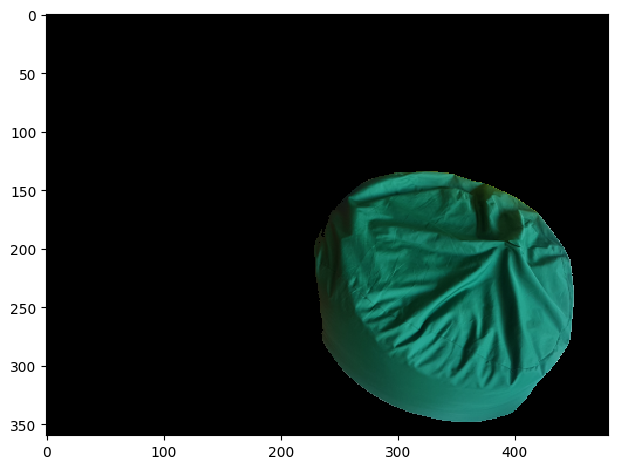

In [89]:
##################################################### SEGUNDO MÉTODO ############################################################
hsv_img = rgb2hsv(img)
fig, ax = plt.subplots(1, 3, figsize = (15,5))
ax[0].imshow(hsv_img[:,:,0], cmap = 'hsv')
ax[0].set_title('hue')
ax[1].imshow(hsv_img[:,:,1], cmap = 'hsv')
ax[1].set_title('transparency')
ax[2].imshow(hsv_img[:,:,2], cmap = 'hsv')
ax[2].set_title('value')
fig.colorbar(imshow(hsv_img[:,:,2], cmap = 'hsv'))
fig.tight_layout()
plt.show()

#AMARILLO
#refer to hue channel (n the colorbar)
lower_mask_yellow = hsv_img[:,:,0] > 0.08
#refer to hue channel (in the colorbar)
upper_mask_yellow = hsv_img[:,:,0] < 0.18
#refer to transparency channel (in the colorbar)
saturation_mask_yellow = hsv_img[:,:,1] > 0.7

mask2_yellow = upper_mask_yellow*lower_mask_yellow*saturation_mask_yellow
red_yellow = img[:,:,0]*mask2_yellow
green_yellow = img[:,:,1]*mask2_yellow
blue_yellow = img[:,:,2]*mask2_yellow
img_masked_yellow = np.dstack((red_yellow,green_yellow,blue_yellow))
imshow(img_masked_yellow)
plt.show()

#AZUL
#refer to hue channel (n the colorbar)
lower_mask_blue = hsv_img[:,:,0] > 0.62
#refer to hue channel (in the colorbar)
upper_mask_blue = hsv_img[:,:,0] < 0.7
#refer to transparency channel (in the colorbar)
saturation_mask_blue = hsv_img[:,:,1] > 0.6

mask2_blue = upper_mask_blue*lower_mask_blue*saturation_mask_blue
red_blue = img[:,:,0]*mask2_blue
green_blue = img[:,:,1]*mask2_blue
blue_blue = img[:,:,2]*mask2_blue
img_masked_blue = np.dstack((red_blue,green_blue,blue_blue))
imshow(img_masked_blue)
plt.show()

#NARANJA
#refer to hue channel (n the colorbar)
lower_mask_orange = hsv_img[:,:,0] > 0.00
#refer to hue channel (in the colorbar)
upper_mask_orange = hsv_img[:,:,0] < 0.08
#refer to transparency channel (in the colorbar)
saturation_mask_orange = hsv_img[:,:,1] > 0.5

mask2_orange = upper_mask_orange*lower_mask_orange*saturation_mask_orange
red_orange = img[:,:,0]*mask2_orange
green_orange = img[:,:,1]*mask2_orange
blue_orange = img[:,:,2]*mask2_orange
img_masked_orange = np.dstack((red_orange,green_orange,blue_orange))
imshow(img_masked_orange)
plt.show()

#VERDE
#refer to hue channel (n the colorbar)
lower_mask_green = hsv_img[:,:,0] > 0.2
#refer to hue channel (in the colorbar)
upper_mask_green = hsv_img[:,:,0] < 0.5
#refer to transparency channel (in the colorbar)
saturation_mask_green = hsv_img[:,:,1] > 0.2

mask2_green = upper_mask_green*lower_mask_green*saturation_mask_green
red_green = img[:,:,0]*mask2_green
green_green = img[:,:,1]*mask2_green
blue_green = img[:,:,2]*mask2_green
img_masked_green = np.dstack((red_green,green_green,blue_green))
imshow(img_masked_green)
plt.show()


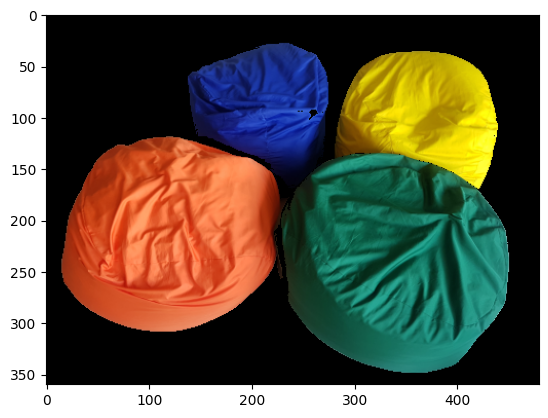

In [90]:
all_masks2 = img_masked_yellow | img_masked_green | img_masked_blue | img_masked_orange
plt.imshow(all_masks2)
plt.show()